In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
# Load the dataset

data = pd.read_csv('apple_quality.csv', index_col=0)
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [30]:
# Let's look into the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4001 entries, 0.0 to nan
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.3+ KB


In [31]:
# Let's look at the count of nulls in the dataset
data.isnull().sum()

Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [32]:
# Let's look at the row with the null columns
data[data.Size.isnull()]

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [33]:
# Only one row of nulls
# Let's drop the row with the null columns

data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0.0 to 3999.0
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.2+ KB


In [34]:
# Change the float datatype index of the dataset to integer index

data.index = data.index.astype(int)
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [35]:
# Let's change the datatype of the column 'Acidity' to float from object

data['Acidity'] = data['Acidity'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


In [36]:
# Let's change the datatype of the column 'Quality' to category

data['Quality'] = data['Quality'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Size         4000 non-null   float64 
 1   Weight       4000 non-null   float64 
 2   Sweetness    4000 non-null   float64 
 3   Crunchiness  4000 non-null   float64 
 4   Juiciness    4000 non-null   float64 
 5   Ripeness     4000 non-null   float64 
 6   Acidity      4000 non-null   float64 
 7   Quality      4000 non-null   category
dtypes: category(1), float64(7)
memory usage: 254.0 KB


In [37]:
# Let's see if the data has any duplicate rows

data[data.duplicated()]

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,,,,,,,,


In [38]:
# There are no duplicate rows
# Let's check the 'Quality' column for any imbalance

data['Quality'].value_counts(normalize=True)*100

Quality
good    50.1
bad     49.9
Name: proportion, dtype: float64

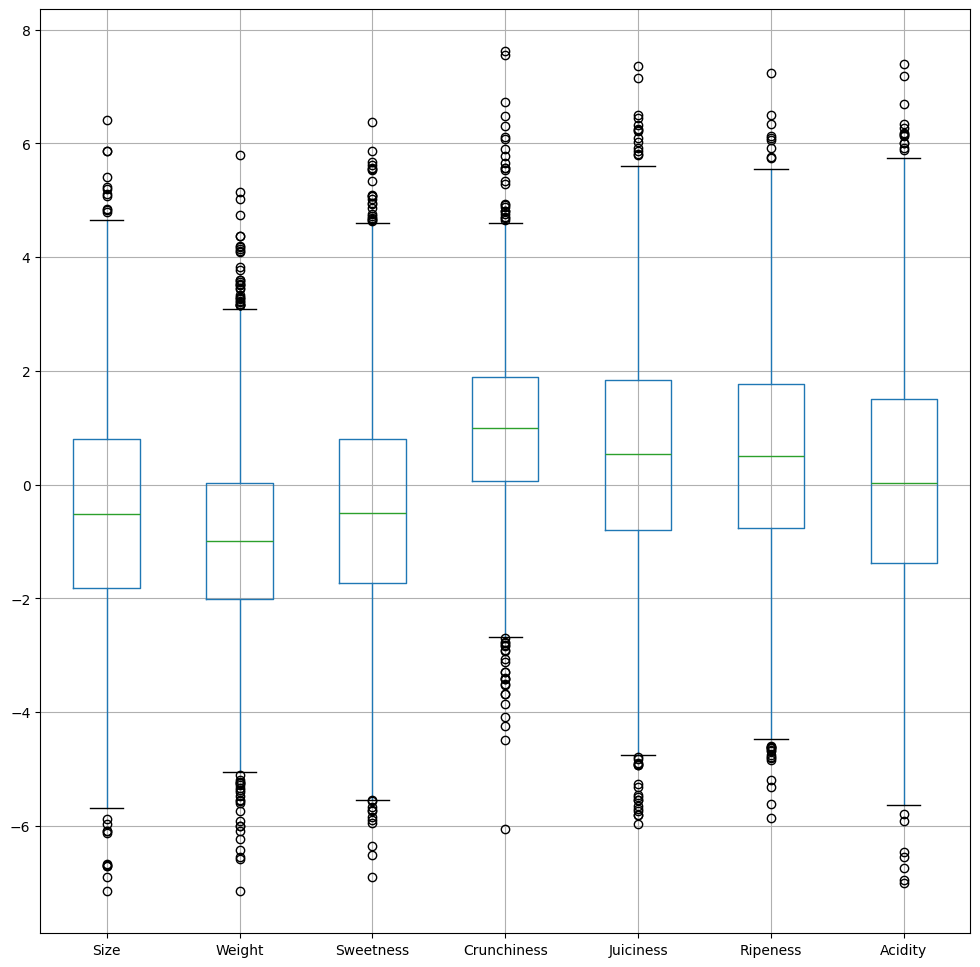

In [39]:
# The data is balanced with equal number of 'good' and 'bad'
# Let's plot the barplots of all the columns of the dataset

data.boxplot(figsize=(12,12))
plt.show()

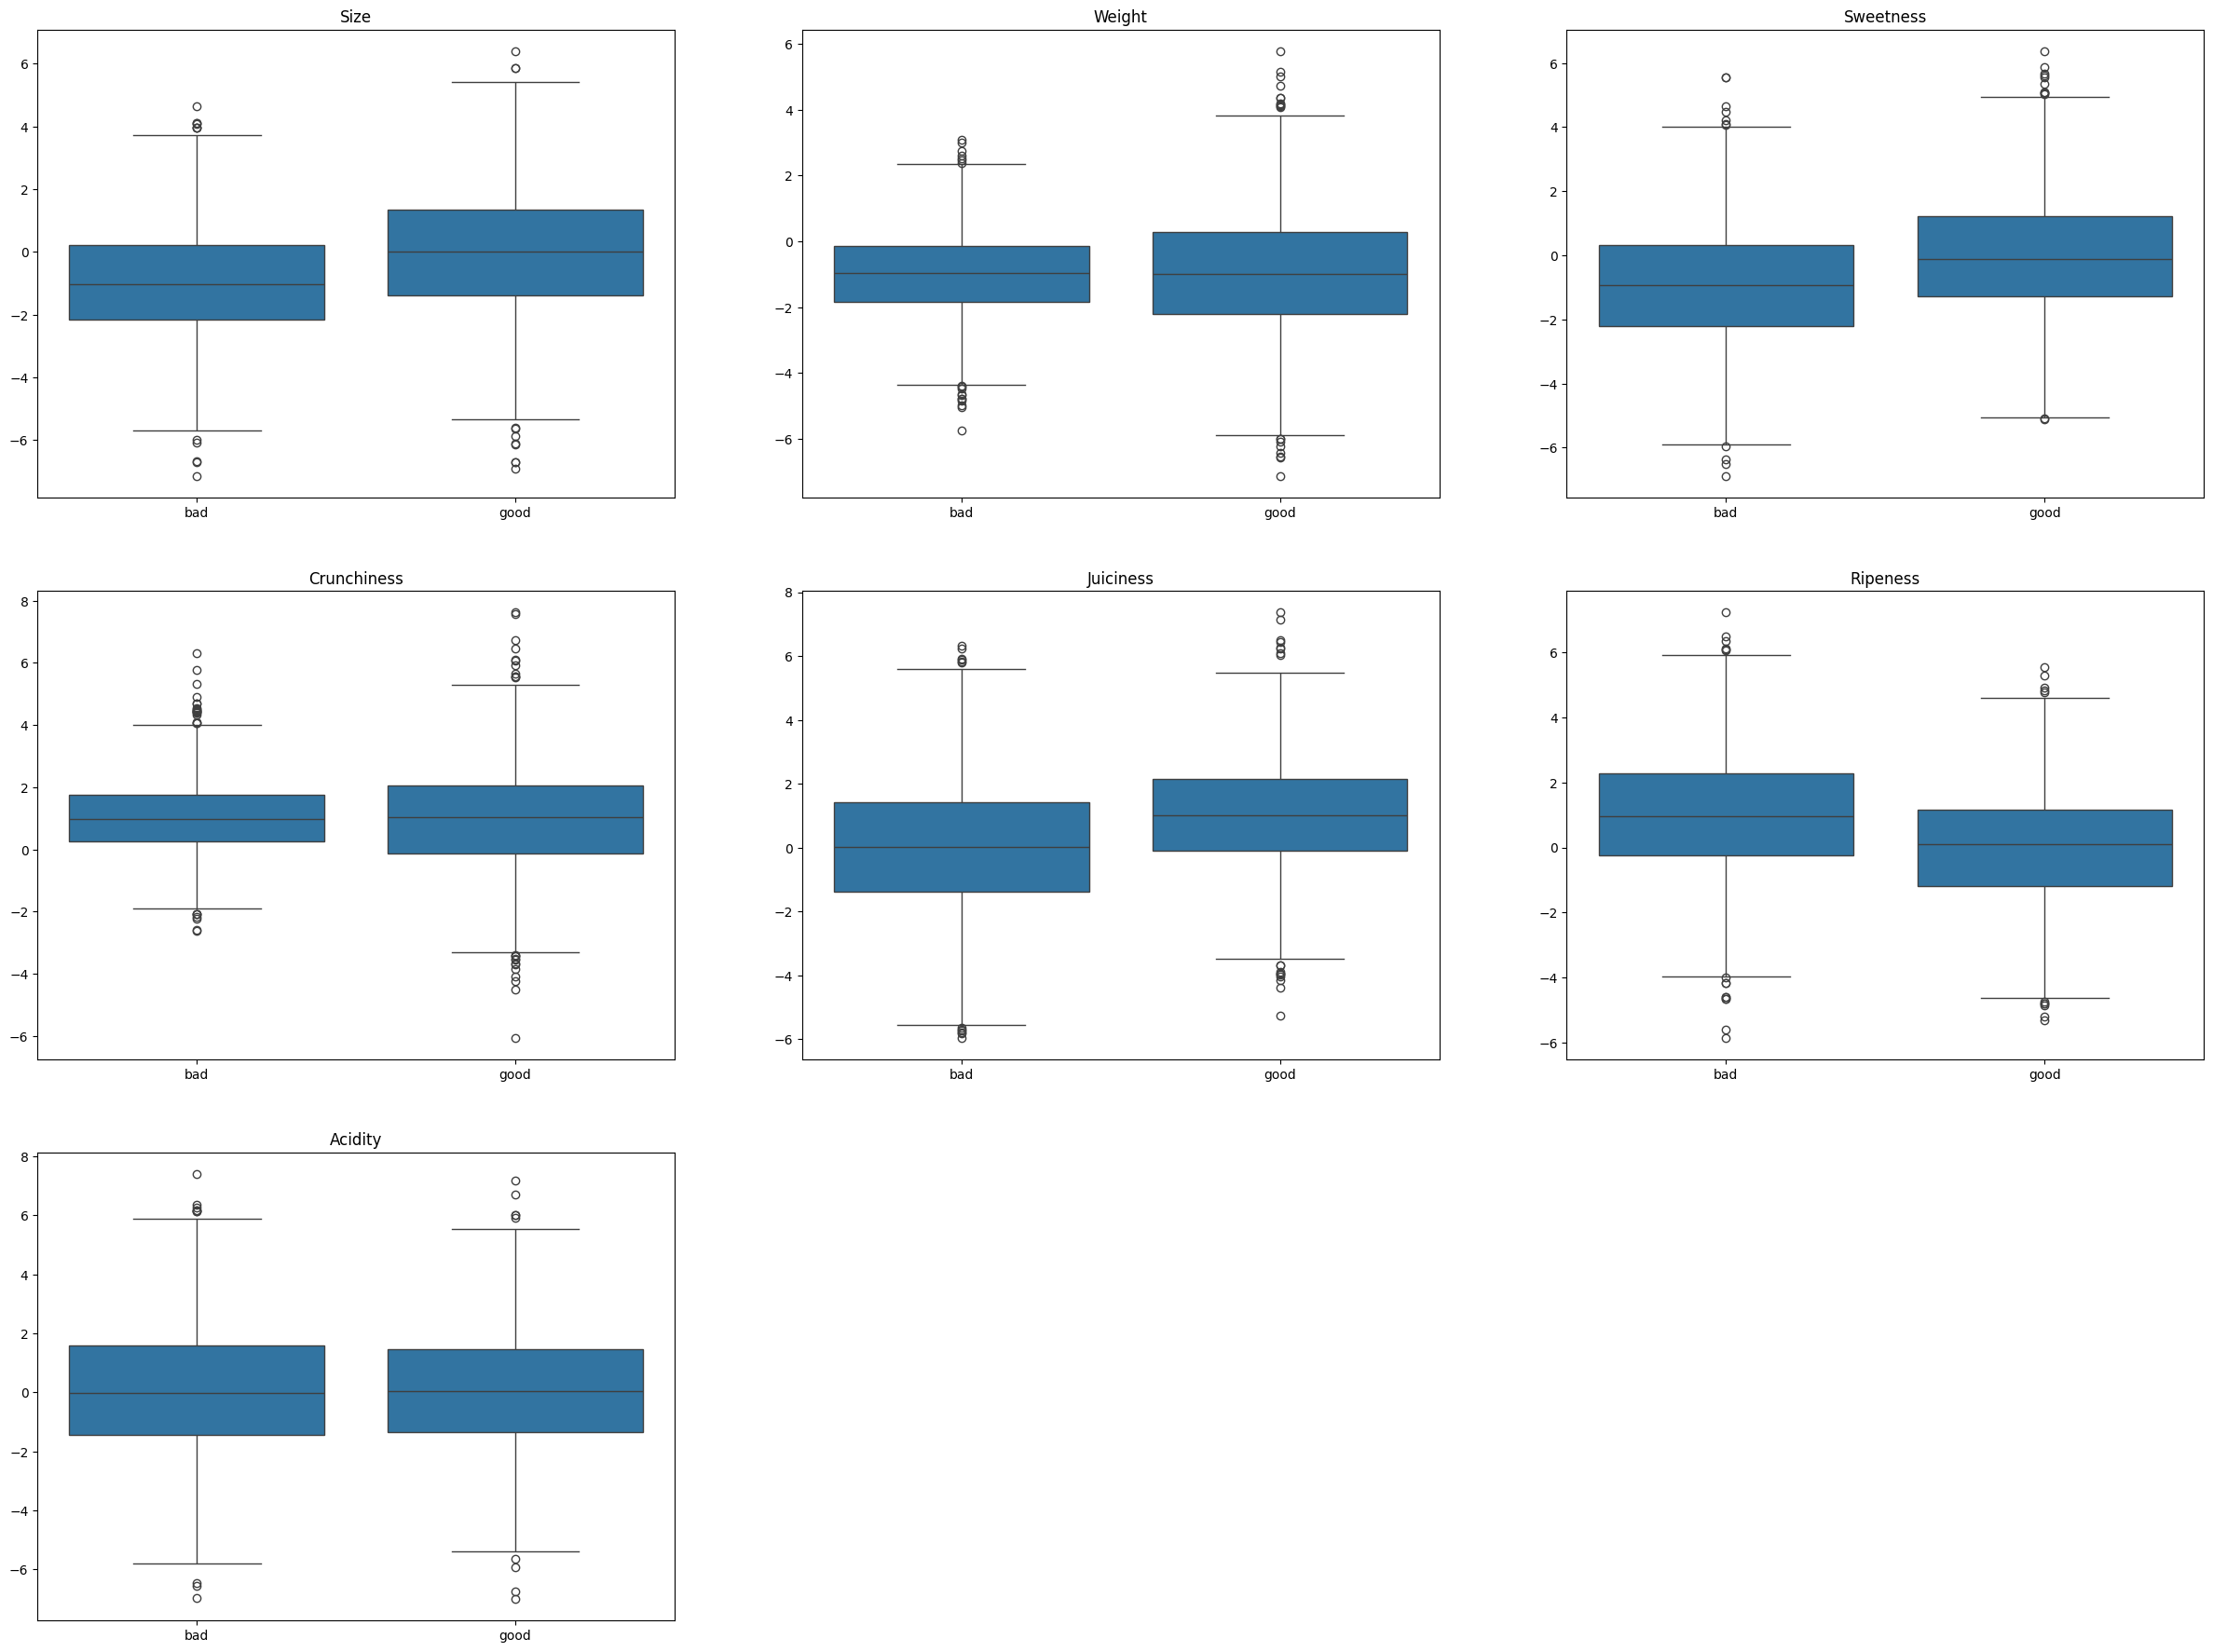

In [40]:
# Let's plot the boxplot of all the columns of the dataset with respect to the 'Quality' column

plt.figure(figsize=(30,30))

for i, column in enumerate(data.columns):
    if column!= 'Quality':
        plt.subplot(4, 3, i+1)
        sns.boxplot(x='Quality', y=column, data=data)
        plt.title(column)
        plt.ylabel(None)
        plt.xlabel(None)
plt.show()

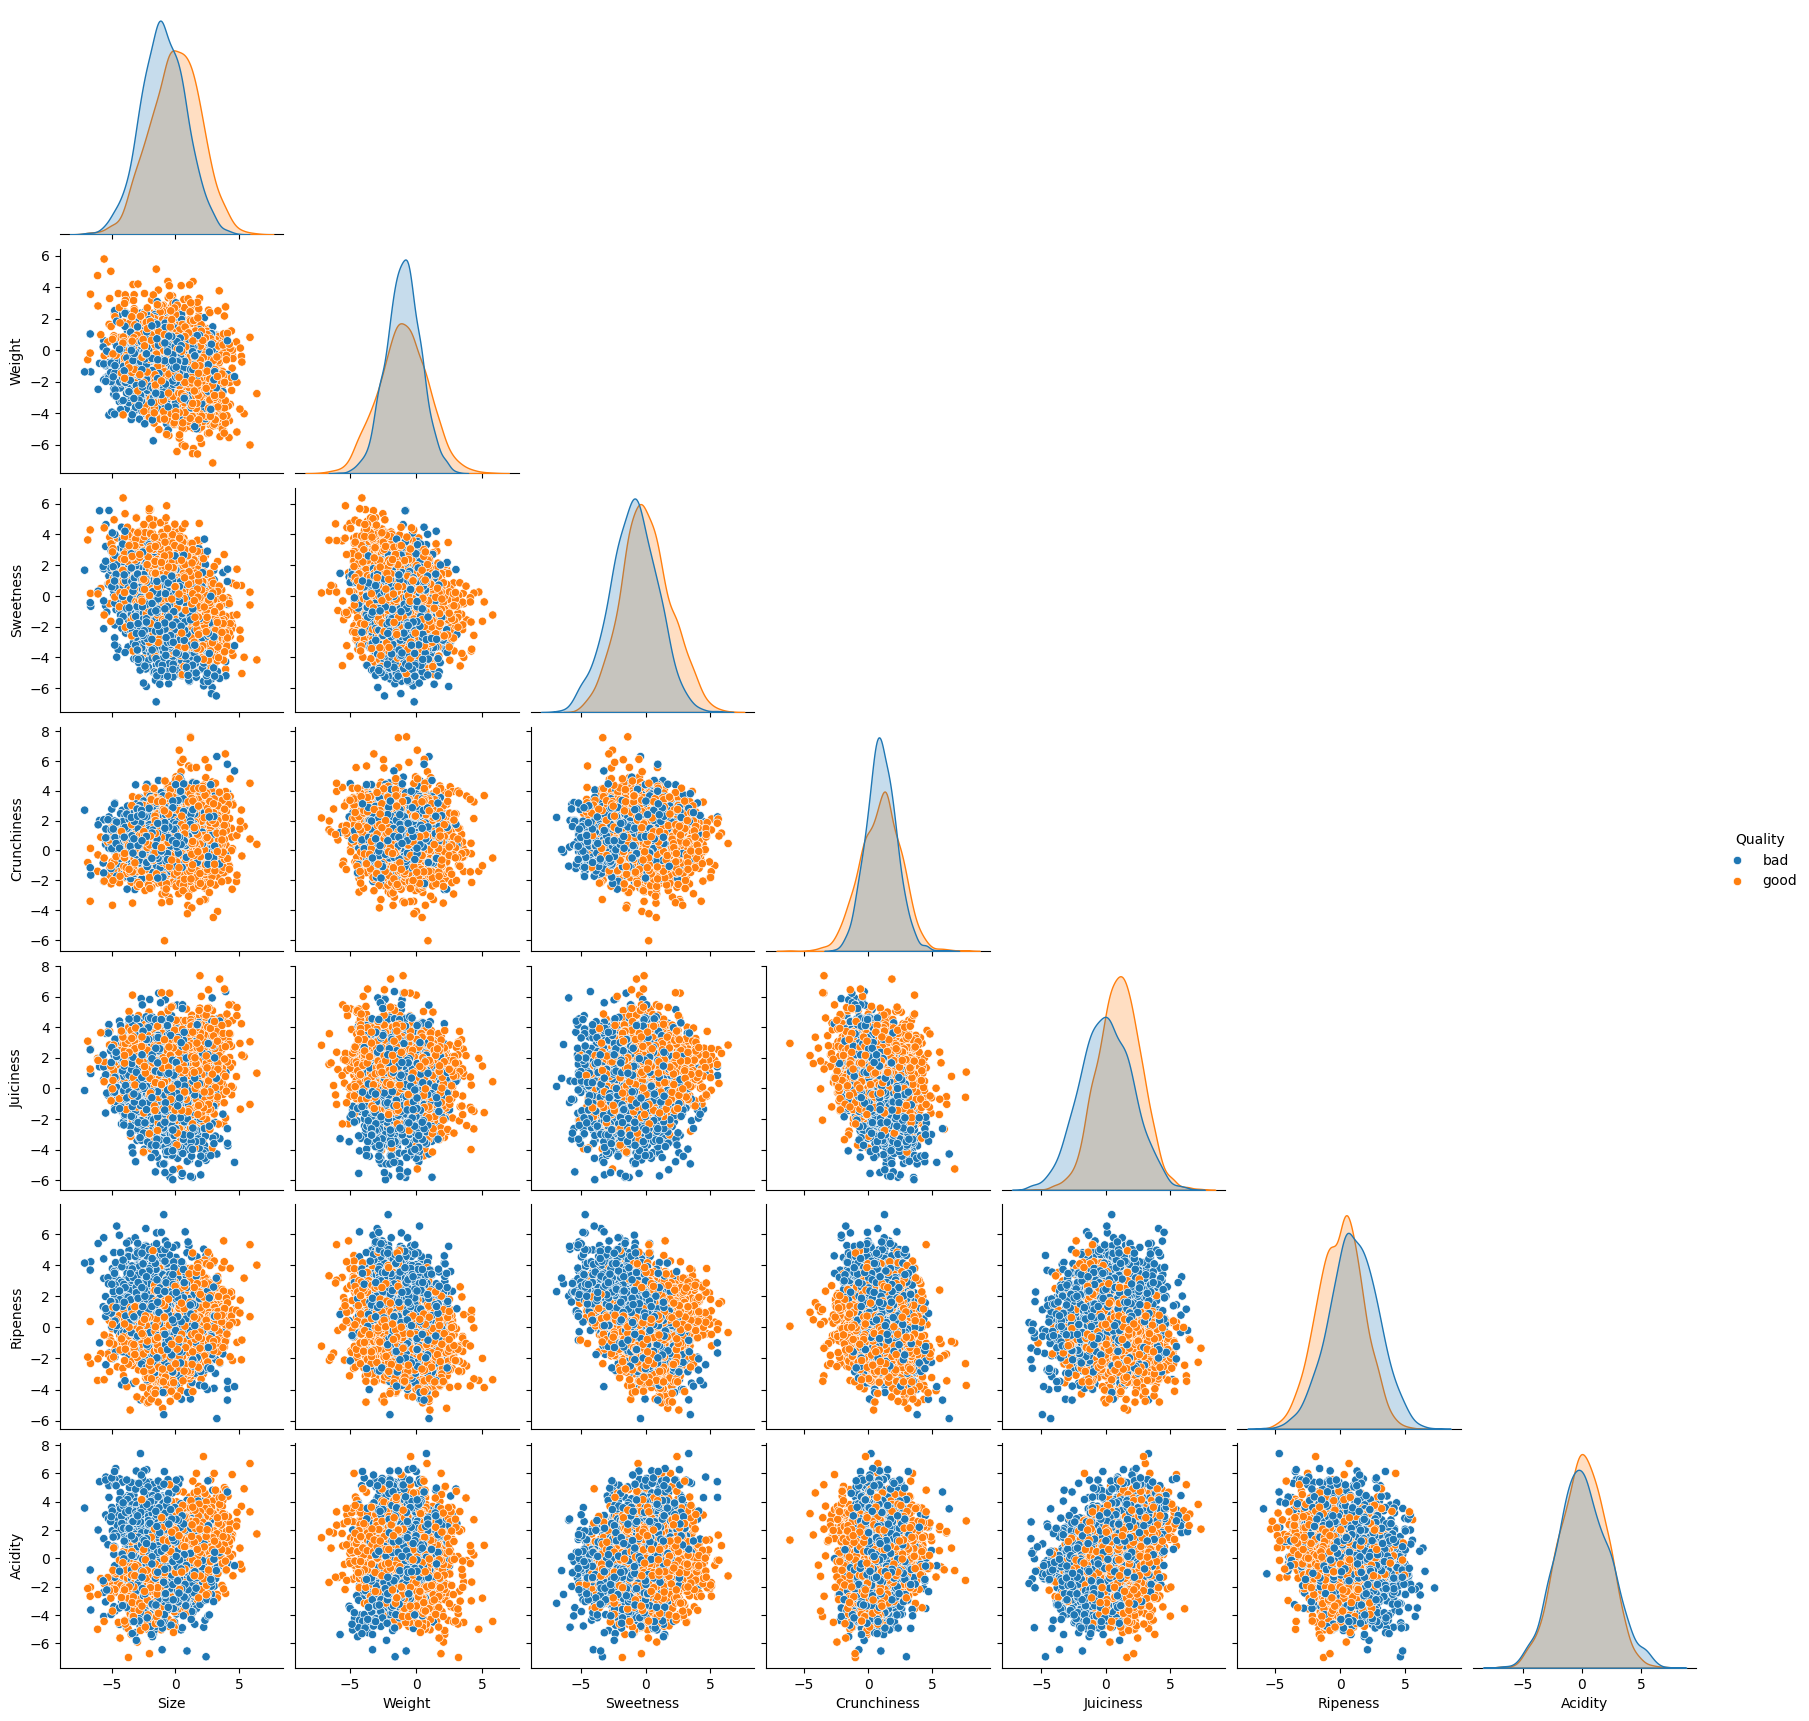

In [41]:
# Let's plot the scatterplot of all the columns with 'Quality' column as hue

sns.pairplot(data, hue='Quality', corner=True)
plt.show()

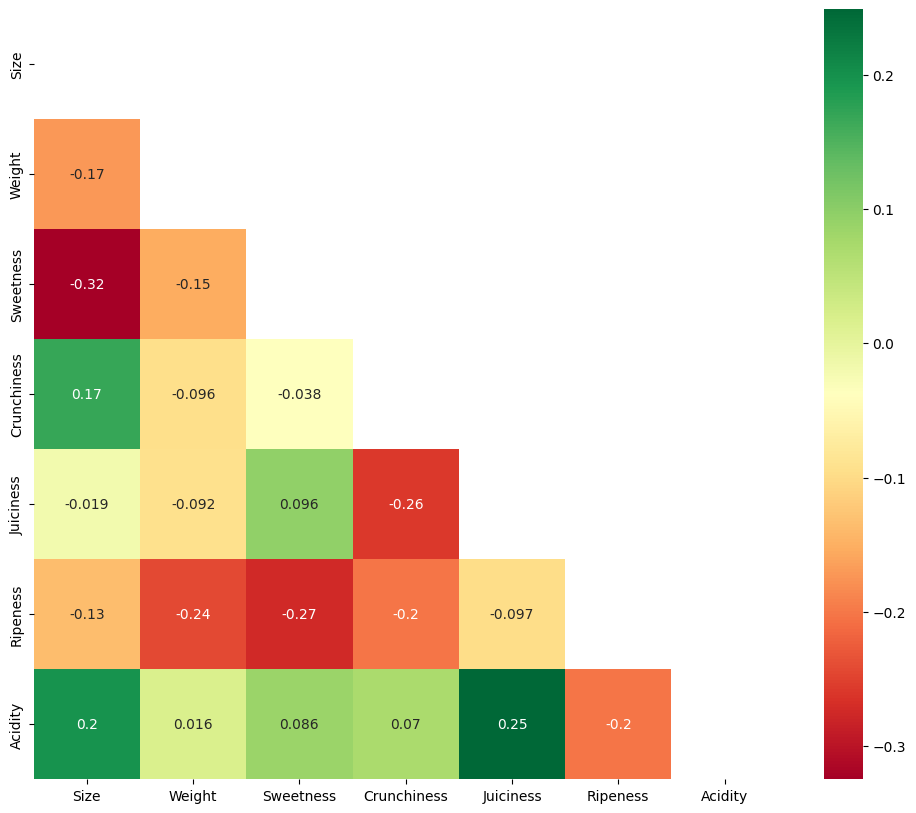

In [42]:
# Let's create a correlation matrix and plot its heatmap

corr_matrix = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlGn')
plt.show()

In [43]:
# From the above plots, it is evident that 
# 1. No column is having heavy outlier values
# 2. No two columns are showing any pattern in the pair plot
# 3. No two columns are having large correlation

# Let's split the data into train and test

X = data.drop('Quality', axis=1)
y = data['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Let's scale the data

scaler = MinMaxScaler()
cols = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=cols)
X_test = pd.DataFrame(scaler.transform(X_test),columns=cols)
X_train


,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.643716,0.289048,0.434681,0.354941,0.679611,0.418789,0.603058
1,0.725323,0.604515,0.442435,0.556278,0.424733,0.250991,0.528225
2,0.445990,0.528458,0.584150,0.364455,0.641996,0.402859,0.220655
3,0.424973,0.601603,0.354852,0.458029,0.434445,0.558664,0.423254
4,0.564385,0.383058,0.625911,0.329074,0.370899,0.369616,0.585888
...,...,...,...,...,...,...,...
2795,0.616225,0.379436,0.327258,0.460217,0.709959,0.414970,0.688308
2796,0.402259,0.387135,0.419133,0.379834,0.491344,0.623276,0.285410
2797,0.709229,0.396745,0.499215,0.366073,0.344791,0.790411,0.568638
2798,0.403523,0.437014,0.640869,0.451326,0.474259,0.485400,0.432008


In [44]:
# Let's create a logistic regression model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
# Let's predict the output
y_pred = model.predict(X_test)

# Let's evaluate the model

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred, average='weighted')
recall = sklearn.metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = sklearn.metrics.f1_score(y_test, y_pred, average='weighted')

print(accuracy, precision, recall, f1_score)

0.75 0.749991663864799 0.75 0.7499874971868671
